In [182]:
import re
import numpy as np
import pandas as pd
import pickle
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import nltk
from konlpy.tag import Okt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as km

# 한글 폰트 설정
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~')

### Stemming & tokenizing & Word2vec

In [158]:
path = "../../datas/"
stopwords = ['','다','좀', '있다', '조금', '요', '되어다', '더', '너', '친', '가자', '아주', '그렇다', '바라','싶다',
             '및', '...', '도', '수', '나다', '엄청', '것', '점', '등', '사', '에', '옆','이다','보다', '되다', '항상', '어요']
data = pd.read_csv(path+"v5_category_re_token_sum.csv")

new_list = []
for r in range(len(data)):
    try: 
        rv = data['highlight_review'].iloc[r]
        rv = rv.split(" ")
        rv.append(data['category'].iloc[r])
        rv = [re.compile('[^가-힣]+').sub("", r) for r in rv]
        rv = [re.compile('[은, 는, 이, 도]+').sub("", r) for r in rv]
        new_list.append(rv)
    except:
        new_list.append("")

data['cat_plus_rv'] = new_list
reviews = data['cat_plus_rv']
model = Word2Vec(reviews, sg=1, # skinp-gram: 중심단어로 주변단어 예측
                 vector_size=3,
                 workers=6, 
                 window=5,      # 중심 단어로부터 좌우 n개까지 학습에 적용
                 min_count=200, # 전체 문서에서 최소 n회 이상 출현 단어로 학습
                 sample=0.001
                ) 
word_vectors = model.wv

vocabs = list(word_vectors.index_to_key)
vocabs = [word for word in vocabs if word not in stopwords and len(word)>1]
word_vectors_list = [word_vectors[v] for v in vocabs]

print(len(vocabs), vocabs)

194 ['좋다', '메인시설', '서비스', '친절하다', '만족', '너무', '사장님', '깨끗하다', '분위기', '시설', '청결', '부대공용시설', '전망', '위치', '화장실', '수영장', '자다', '깔끔하다', '정말', '많다', '가격', '만족하다', '계곡', '하다', '없다', '샤워실', '개수대', '직원분들', '넘다', '가깝다', '모두', '샤워장', '넓다', '경치', '오다', '괜찮다', '아쉽다', '조용하다', '음식조식', '매우', '비품', '따뜻하다', '가다', '관리', '편하다', '친절', '너무좋다', '않다', '만족스럽다', '관리가', '글램핑', '뷰가', '캠핑장', '풍경', '주변', '너무너무', '불편하다', '아들', '진짜', '놀다', '내부', '잘되어다', '들다', '편의시설', '예쁘다', '사장님께서', '청결하다', '사트', '같다', '벌레', '온수', '최고다', '카라반', '쁘다', '쉬다', '바베큐', '벌레가', '매점', '바로', '좋아하다', '생각보다', '완전', '나오다', '분위기가', '최고', '크다', '멀다', '안되다', '경치가', '다음에', '나무', '맛있다', '바다', '너무친절하다', '예약', '잘되다', '저렴하다', '사모님', '시원하다', '숙소', '잘나오다', '샤워시설', '차다', '용하다', '깨끗', '경치좋다', '매너타임', '사장님들', '난방', '즐겁다', '시설깨끗하다', '바닥', '힘들다', '부대시설', '주인분', '좁다', '맘에', '앞에', '사장님친절하다', '물놀', '주인분들', '작다', '내외분', '화장실과', '직원분', '굉장하다', '간격', '해주다', '가성비', '마음에', '가격대비', '보내다', '서다', '공기', '전체적으로', '부족하다', '재밌다', '시설들', '나무가', '분위기좋다', '시간', '심하다', '주인', '계곡물'

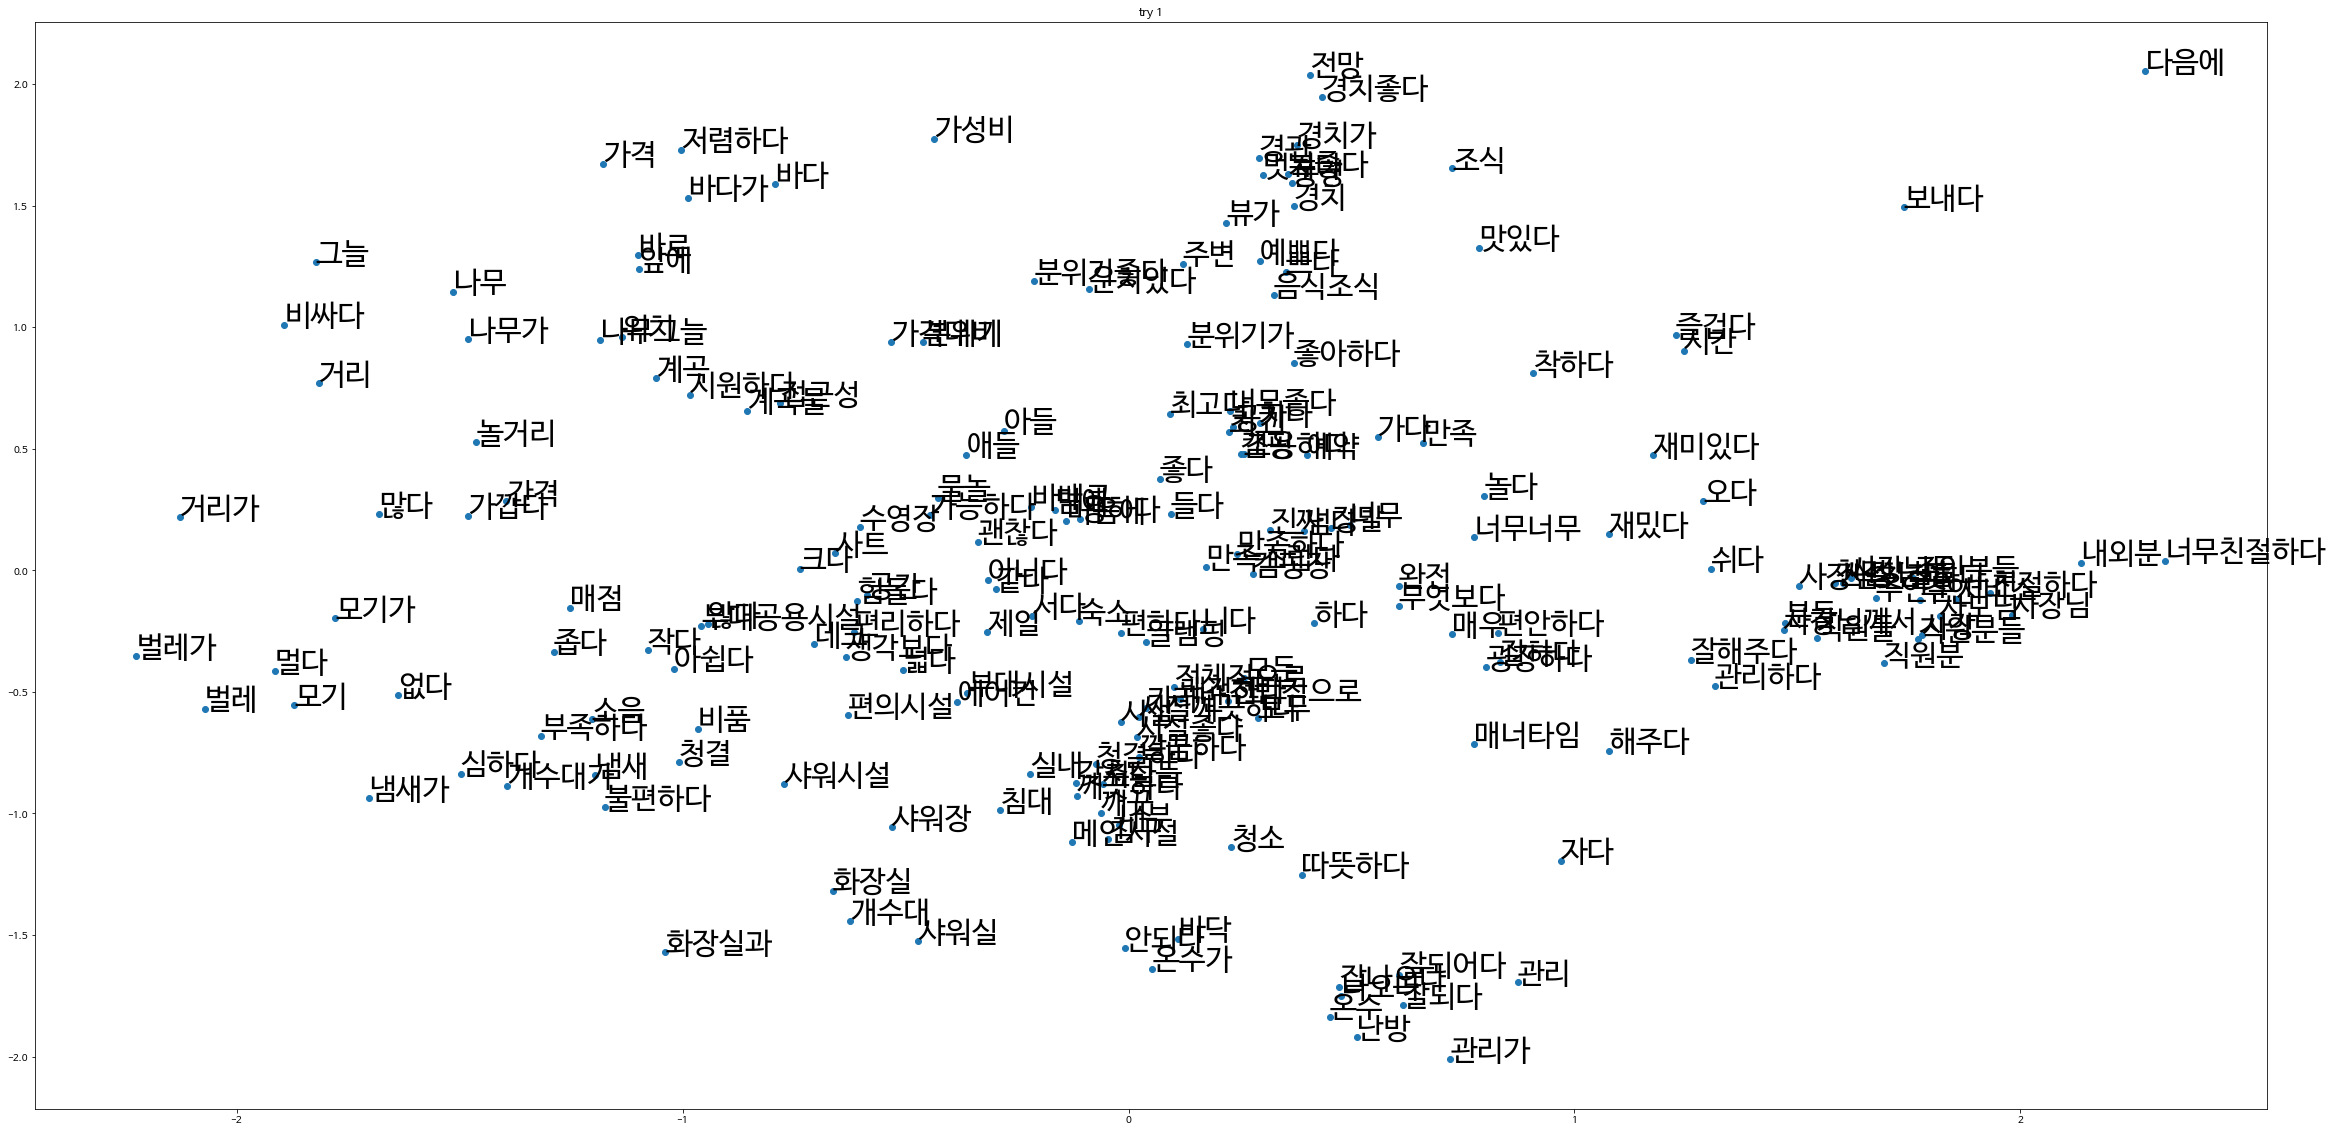

In [159]:
pca = PCA(n_components=3)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

plt.figure(figsize=(40, 20))
plt.title("PCA clustering")
plt.scatter(xs, ys)
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]), fontsize=30)
plt.show()

### KMeans

[1076.306515555426, 991.8194919467049, 927.5922748012725, 881.1564277153865, 836.2300851298742, 808.9474408696753, 774.4696191234328, 747.1515182914743, 730.2634748010335, 701.4957318362491]


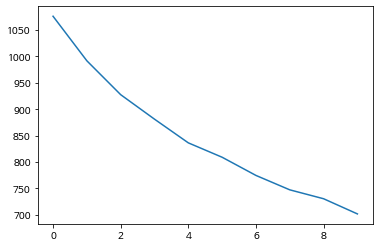

In [140]:
from sklearn.cluster import KMeans as km
inertia = []    # cluster 응집도
for k in range(1,11):    # 10개까지
    model = km(n_clusters = k)
    model.fit(word_vectors_list)
    inertia.append(model.inertia_)
print(inertia)
plt.plot(inertia);

predict_list: [1 0 2 2 2 2 2 0 1 0 0 0 1 1 0 1 2 0 2 1 1 2 1 2 0 0 0 2 2 1 0 0 0 1 2 1 0
 1 1 2 0 0 2 0 0 2 1 0 0 0 0 1 2 1 1 2 0 1 2 2 0 0 1 0 1 2 0 0 0 0 0 1 0 1
 2 1 0 0 1 1 0 2 0 1 1 0 0 0 1 2 1 1 1 2 1 0 1 2 1 0 0 0 1 1 0 1 2 2 0 2 0
 0 0 0 2 0 1 1 2 1 2 0 2 0 2 2 1 2 1 1 1 2 0 1 0 0 2 0 1 1 2 0 2 1 0 0 0 1
 0 0 1 0 2 0 0 1 0 1 1 0 0 0 0 1 1 1 2 0 0 1 2 2 1 0 0 1 2 2 1 2 0 1 2 1 0
 0 0 0 2 1 0 2 2 1]


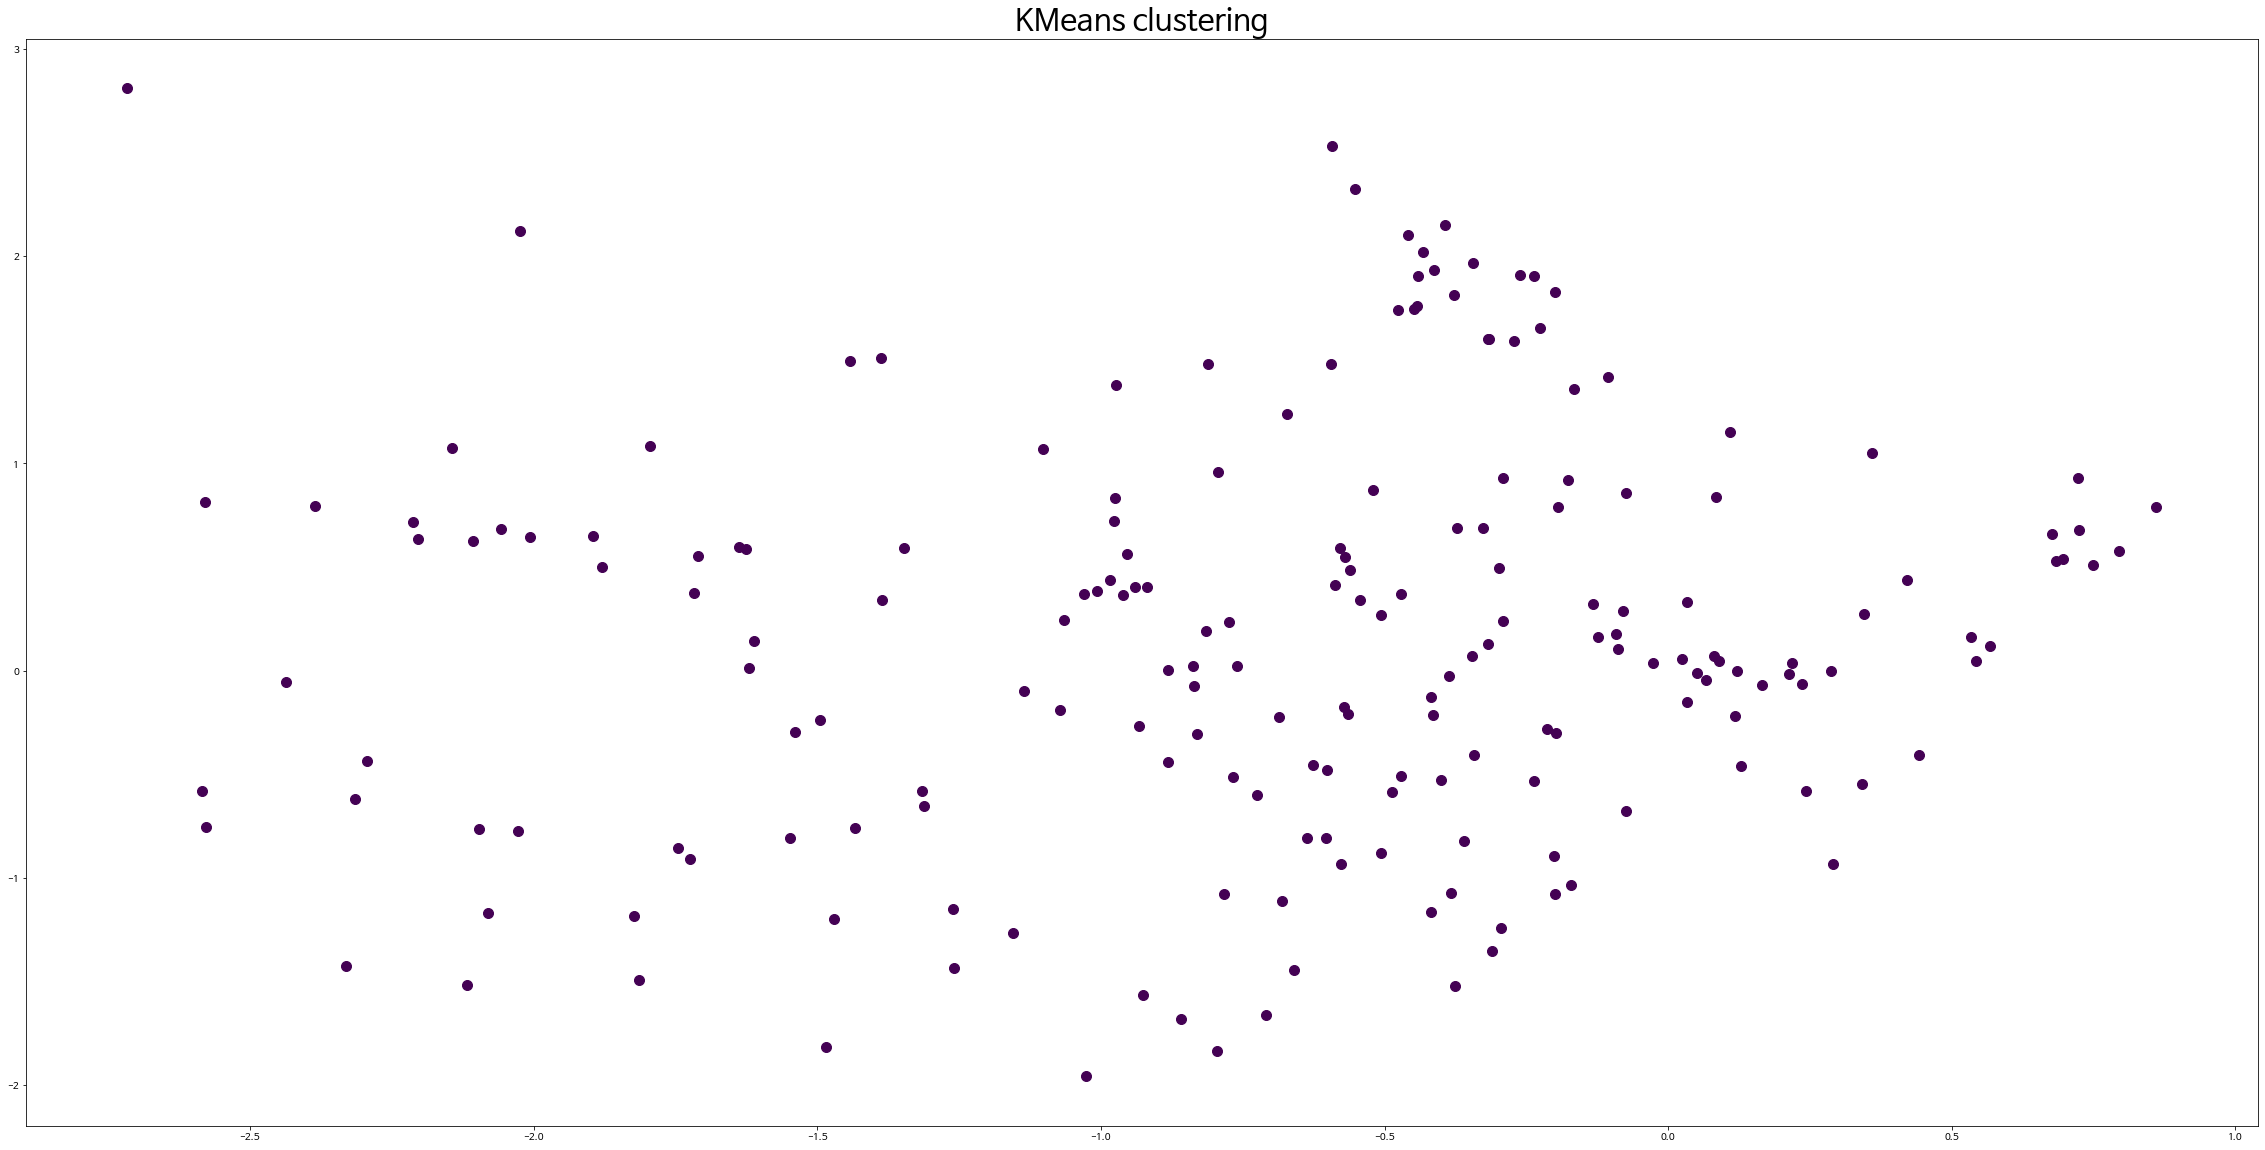

In [181]:
# 적절한 n_components를 찾을 수 없어..3으로 진행
n = 3
km_model = km(n_clusters = n, algorithm = 'auto')
xys = km_model.fit(word_vectors_list)
predict_list = km_model.predict(word_vectors_list)    # clustering
group_list = [ [] for _ in range(n)]   # 잘 됐는지 확인하는 list
for i in range(n):
    group_list[i] = [word_vectors_list[idx] for idx,j in enumerate(predict_list) if j == i]
print("predict_list:",predict_list)
x = word_vectors_list
y = predict_list

plt.figure(figsize=(40, 20))
plt.title("KMeans clustering", fontsize=30)
for i in range(len(word_vectors_list)):
    plt.scatter(x[i][0], x[i][1], c=y[i], s=100)